# Data Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import spacy
spacy_nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = '/content/drive/MyDrive/kuliah/andro/ds beginner/AI vs Human.csv'

df = pd.read_csv(path)
df.head()

,text,generated
0,If I've missed a day of class and I need the n...,0.0
1,"In America, students are far from tee top perf...",0.0
2,It seems that almost everyone I know has a CAE...,0.0
3,As the world changes and humans present more a...,0.0
4,"According to the article"" Unmasking the Face o...",0.0


# Data Preprocessing

In [4]:
df_prep = df.copy()

## Cek nilai Null

In [5]:
df_prep.isnull().sum()

,0
text,0
generated,0


## Mengubah teks menjadi huruf kecil

In [6]:
def lower_text(text):
  return text.lower()

df_prep['text'] = df_prep['text'].apply(lower_text)
df_prep.head()

,text,generated
0,if i've missed a day of class and i need the n...,0.0
1,"in america, students are far from tee top perf...",0.0
2,it seems that almost everyone i know has a cae...,0.0
3,as the world changes and humans present more a...,0.0
4,"according to the article"" unmasking the face o...",0.0


## Menghapus tanda baca dan angka

In [7]:
def remove_punc(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text) #Menghapus yang bukan a-z, A-Z, dan spasi
  return text

df['text'] = df['text'].apply(remove_punc)
df.head()

,text,generated
0,If Ive missed a day of class and I need the no...,0.0
1,In America students are far from tee top perfo...,0.0
2,It seems that almost everyone I know has a CAE...,0.0
3,As the world changes and humans present more a...,0.0
4,According to the article Unmasking the Face on...,0.0


## Tokenisasi

In [8]:
def tokenize(text):
  text = word_tokenize(text)
  return text

df['text'] = df['text'].apply(tokenize)
df.head()

,text,generated
0,"[If, Ive, missed, a, day, of, class, and, I, n...",0.0
1,"[In, America, students, are, far, from, tee, t...",0.0
2,"[It, seems, that, almost, everyone, I, know, h...",0.0
3,"[As, the, world, changes, and, humans, present...",0.0
4,"[According, to, the, article, Unmasking, the, ...",0.0


## Menghapus stopword

In [9]:
def stopword(text):
  stop_words = set(stopwords.words('english'))
  text = [word for word in text if word not in stop_words]
  return text

df['text'] = df['text'].apply(stopword)
df.head()

,text,generated
0,"[If, Ive, missed, day, class, I, need, notes, ...",0.0
1,"[In, America, students, far, tee, top, perform...",0.0
2,"[It, seems, almost, everyone, I, know, CAE, Ho...",0.0
3,"[As, world, changes, humans, present, issues, ...",0.0
4,"[According, article, Unmasking, Face, Mars, tw...",0.0


## Melakukan Lemmatization

In [ ]:
def lemmatization(text):
  doc = spacy_nlp(text)
  token = [token.lemma_ for token in doc]
  return token

df_prep['text'] = df_prep['text'].apply(lemmatization)
df_prep.head()

Karena proses lemmatization sangat lama, maka dataset hasil lemmatization disimpan untuk digunakan pada proses berikutnya

# Preprocessing hasil lemmatization

Setelah diperiksa kembali, ternyata masih banyak komponen tidak perlu yang belum terhapus setelah proses lemmatization. Maka dari itu, dilakukan preprocessing kembali.

In [10]:
path = '/content/drive/MyDrive/kuliah/andro/ds beginner/df_prep.csv'
df = pd.read_csv(path)

In [11]:
df_prep = df.copy()

In [12]:
special_char = re.compile(r'[^a-zA-Z\s]')

def merge_words(text):
  text = ''.join(text)
  return text

def remove_whitespace(text):
  corrected = str(text)
  corrected = re.sub(r'\s+', ' ', corrected)
  return corrected.strip()

def lower_remove_punctuation(text):
  text = text.lower()
  text = special_char.sub(' ', text)
  return text

def tokenize(text):
  text = word_tokenize(text)
  return text

def delete_one_char(text):
  text = [word for word in text if len(word) > 1]
  return text

df_prep['text'] = df_prep['text'].apply(merge_words)
df_prep['text'] = df_prep['text'].apply(remove_whitespace)
df_prep['text'] = df_prep['text'].apply(lower_remove_punctuation)
df_prep['text'] = df_prep['text'].apply(tokenize)
df_prep['text'] = df_prep['text'].apply(delete_one_char)
df_prep.head()

,text,generated
0,"[if, have, miss, day, of, class, and, need, th...",0.0
1,"[in, america, student, be, far, from, tee, top...",0.0
2,"[it, seem, that, almost, everyone, know, have,...",0.0
3,"[as, the, world, change, and, human, present, ...",0.0
4,"[accord, to, the, article, unmask, the, face, ...",0.0


gabungkan kembali sebelum masuk ke tokenizer

In [13]:
def merge_words(text):
  text = ' '.join(text)
  return text

df_prep['text'] = df_prep['text'].apply(merge_words)
df_prep.head()

,text,generated
0,if have miss day of class and need the note wo...,0.0
1,in america student be far from tee top perform...,0.0
2,it seem that almost everyone know have cae xa ...,0.0
3,as the world change and human present more and...,0.0
4,accord to the article unmask the face on mar t...,0.0


## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_prep['text'], df_prep['generated'], test_size=0.2, random_state=42)

# Model Preparation

## Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq)

In [ ]:
# Model LSTM
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Kompilasi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
print('Training:\n')
model.fit(X_train_pad, y_train, epochs=5, verbose=2)

# Evaluasi
print('\n\nEvaluation:\n')
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=2)

Training:

Epoch 1/5
1500/1500 - 74s - 50ms/step - accuracy: 0.9412 - loss: 0.1707
Epoch 2/5
1500/1500 - 81s - 54ms/step - accuracy: 0.9757 - loss: 0.0781
Epoch 3/5
1500/1500 - 80s - 53ms/step - accuracy: 0.9870 - loss: 0.0434
Epoch 4/5
1500/1500 - 82s - 54ms/step - accuracy: 0.9876 - loss: 0.0399
Epoch 5/5
1500/1500 - 82s - 55ms/step - accuracy: 0.9929 - loss: 0.0227


Evaluation:

375/375 - 7s - 18ms/step - accuracy: 0.9839 - loss: 0.0607


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


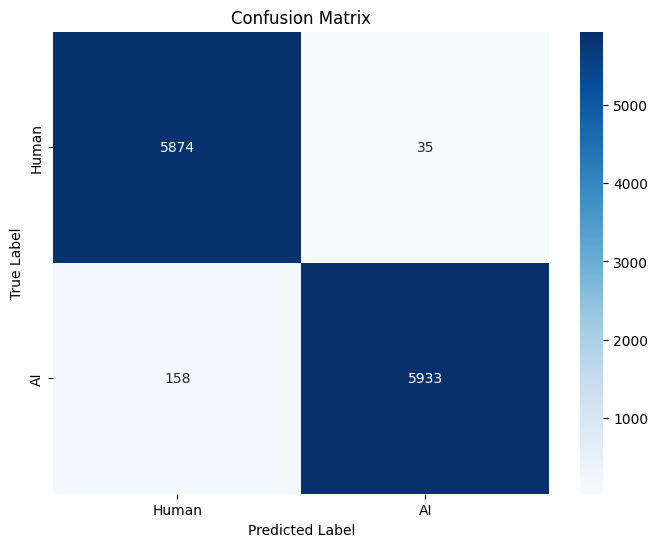

In [ ]:
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Test Model

In [ ]:
text = "my argument about the 10 pm curfew for teenager be that it can help keep they safe and ensure they get enough rest for school firstly stay oat late at night can pat teenager at risk of harm such as getting lose or be involve in dangerous situation curfew can help prevent this by ensure that teenager be home before it get too dark and potentially unsafe additionally if teenager be pick app by guardian when they be late they can avoid any potential danger that may be lark outside secondly get enough rest be racial for teenager academic performance if teenager do not get enough sleep they may straggle to concentrate in class and perform poorly on test curfew can help ensure that teenager get enough rest by require they to be home at certain time each night this can lead to improve academic performance and well grade counterargument to this be that teenager can simply stay home and not worry about curfew or go home late however this may not always be the safe option if teenager be scared to go home late or can not get enough rest at home they may still be at risk of harm or academic failure additionally parent may not always be able to provide the necessary level of supervision or protection for their child in conclusion while there be valid counterargument to curfew for teenager the benefit of keep they safe and ensure they get enough rest for school far outweigh any potential drawback curfew can help prevent harm improve academic performance and ultimately lead to happy and more successful father for teenager"

def preprocess_text(text):
  text = remove_whitespace(text)
  text = lower_remove_punctuation(text)
  text = stopword(text)
  text = tokenizer.texts_to_sequences([text])
  text = pad_sequences(text)
  return text

def remove_whitespace(text):
  text = str(text)
  text = re.sub(r"\s+", " ", text)
  return text.strip()

def lower_remove_punctuation(text):
  text = text.lower()
  text = special_char.sub(' ', text)
  return text

def stopword(text):
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word not in stop_words]
  return " ".join(filtered_words)

text = preprocess_text(text)
print(text)

[[ 441 1120 3197 1342  848   34  178  315  247   44  349  894   33  579
   308 4503  852  976 6956  848  273  949 1161  402  544  517  331 1342
    34  501  247  848  159   44 2805  850 2950  290  848  511 1434 2718
   852  503  218  446   69    1  543  556   44  349  894 3377  848  419
   807  848   44  349 1038   69    1 1931   94  872 3941  462 1342   34
   247  848   44  349  894  236  159  403   42  976  111  165  419  807
    58  204 3417  848  583  308  159  664 1342   61  159  852  145   69
   177  315  306  848 2446   61  159  852   44  349  894  159   69  191
   273  949  419  449  290  318   69  177  121  125  530  455 4429 1499
   286  134 1486 3417 1342  848  113  178  315  247   44  349  894   33
   397  886  218  784 1342   34  501  949  165  419  807  626  111  382
   444  931  848]]


In [ ]:
result = model.predict(text)
result = np.argmax(result, axis=1)

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0]
